### Signal visualization

Text(0, 0.5, 'Amplitude')

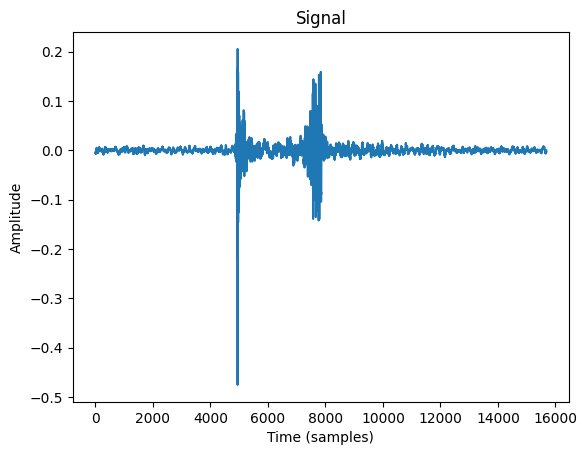

In [17]:
import librosa
import matplotlib.pyplot as plt

y, sr = librosa.load('1.wav')

plt.plot(y)
plt.title('Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')

### Fourier Transform

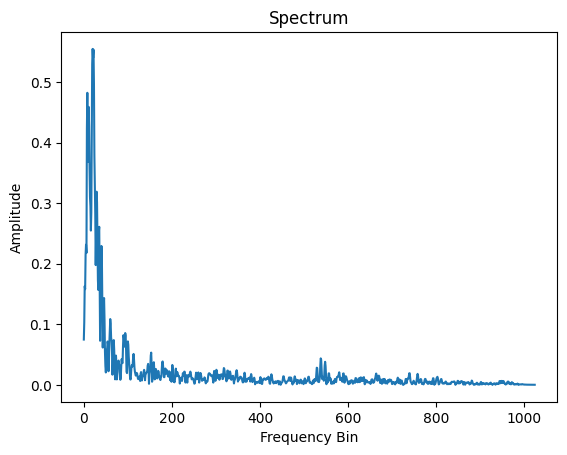

In [5]:
import numpy as np

n_fft = 2048
ft = np.abs(librosa.stft(y[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

Text(0.5, 1.0, 'Spectrogram')

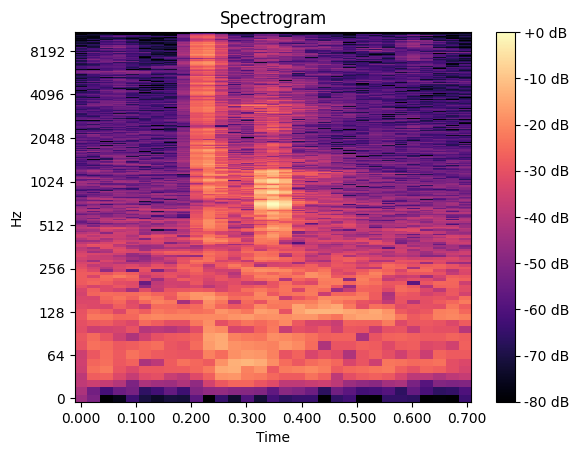

In [15]:
spec = np.abs(librosa.stft(y, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')

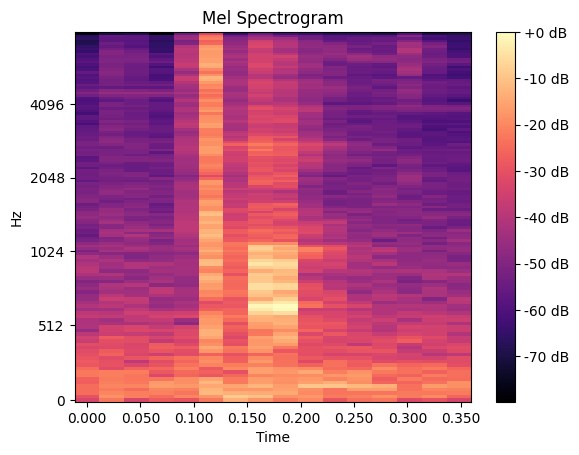

In [16]:
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time')
plt.title('Mel Spectrogram')
plt.colorbar(format='%+2.0f dB')

### PANNs: Large-Scale Pretrained Audio Neural Networks for Audio Pattern Recognition
- **Link**: https://arxiv.org/abs/1912.10211
- **Code**: https://github.com/qiuqiangkong/audioset_tagging_cnn

**Setup steps**:
1. Clone the repo: `git clone https://github.com/qiuqiangkong/audioset_tagging_cnn.git`
2. Move to the folder: `cd audioset_tagging_cnn/`
3. Download the checkpoint: `curl -L "https://zenodo.org/record/3987831/files/Cnn14_mAP%3D0.431.pth" -o Cnn14_mAP_0.431.pth`

Run this command on terminal: 

`python pytorch/inference.py audio_tagging --model_type="Cnn14" --checkpoint_path="Cnn14_mAP_0.431.pth" --audio_path="../sample/1.wav"`

Example output:
```
Using CPU.
Computer keyboard: 0.193
Typing: 0.173
Chop: 0.113
Tick: 0.063
Tick-tock: 0.055
Inside, small room: 0.048
Clicking: 0.048
Music: 0.037
Throat clearing: 0.035
Hiccup: 0.035
embedding: (2048,)
```